In [17]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
data = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [70]:
def run_logistic(feature_cols, data, plot = True):
    #set up data x and y
    X = data[feature_cols]
    y = data.Y 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
    #perform logistic regression

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(random_state=16)

    # fit the model with data
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

    if plot:
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
    else:
        print('Confusion matrix:')
        print(cnf_matrix)
    
    #precision and accuracy

    target_names = ['unhappy', 'happy']
    print(classification_report(y_test, y_pred, target_names=target_names))
    

              precision    recall  f1-score   support

     unhappy       0.82      0.56      0.67        16
       happy       0.67      0.88      0.76        16

    accuracy                           0.72        32
   macro avg       0.74      0.72      0.71        32
weighted avg       0.74      0.72      0.71        32



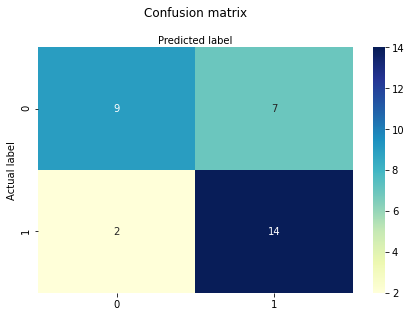

In [31]:
#first run
feature_cols = ['X1', 'X2', 'X3','X4','X5','X6']
run_logistic(feature_cols, data, plot = True)

The results show that using logistic regressin we can achieve above 73% accuracy

In [36]:
#filter features by importance

# Perform feature selection using the chi2 method
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get the feature importances based on the chi2 scores
scores = selector.scores_

# Create a dataframe with the feature names and their importances
features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': scores})

# Sort the dataframe by importance
importances = importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importances)


4    X5
0    X1
2    X3
5    X6
3    X4
1    X2
Name: Feature, dtype: object
  Feature  Importance
4      X5    2.273286
0      X1    1.449041
2      X3    0.900104
5      X6    0.541070
3      X4    0.106194
1      X2    0.036161


Using SelectKBest and Chi squared as a feature selection approach we can see the order of importance of the questions.



In [73]:
def remove_features(features, data):
    features.reverse()
    for i in range(len(features)-1):
        print(f"Feature removed: {features[i]}")
        test_features = features[i+1:]
        run_logistic(test_features, data, False)

In [74]:
features_byimp = list(importances.Feature) #removed X2 based on above results and rerun logisitc regression
#run_logistic(new_feature_cols, data, plot = True)
remove_features(features_byimp, data)

Feature removed: X2
Confusion matrix:
[[ 8  8]
 [ 2 14]]
              precision    recall  f1-score   support

     unhappy       0.80      0.50      0.62        16
       happy       0.64      0.88      0.74        16

    accuracy                           0.69        32
   macro avg       0.72      0.69      0.68        32
weighted avg       0.72      0.69      0.68        32

Feature removed: X4
Confusion matrix:
[[ 8  8]
 [ 2 14]]
              precision    recall  f1-score   support

     unhappy       0.80      0.50      0.62        16
       happy       0.64      0.88      0.74        16

    accuracy                           0.69        32
   macro avg       0.72      0.69      0.68        32
weighted avg       0.72      0.69      0.68        32

Feature removed: X6
Confusion matrix:
[[ 7  9]
 [ 2 14]]
              precision    recall  f1-score   support

     unhappy       0.78      0.44      0.56        16
       happy       0.61      0.88      0.72        16

    accurac

based on the above results we see that we lose accuracy (under 73%) and precision by removing any feature but that we still get a 71% accuracy simply by asking if people were satisfied with their courier (X5)